In [1]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Users/harrisonwang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('./fundamentals.csv')
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [3]:
data_cleaner = data.copy()
# Dropping columns based off of knowledge and/or null values
data_cleaner.drop(labels=['Unnamed: 0', 'Period Ending', 'For Year', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders','Net Income-Cont. Operations',
                         'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Misc. Stocks', 'Net Cash Flow', 'Retained Earnings', 'Sale and Purchase of Stock',
                        'Total Liabilities & Equity', 'Treasury Stock', 'Earnings Per Share', 'Estimated Shares Outstanding', 'Cash Ratio', 'Current Ratio', 'Quick Ratio', 'Total Current Liabilities'], axis=1, inplace = True)

In [4]:
import pandas as pd
from skimpy import clean_columns
data_cleaner = clean_columns(data_cleaner)
data_cleaner.head()

59 column names have been cleaned

,ticker_symbol,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,...,profit_margin,research_and_development,sales_general_and_admin,short_term_debt_current_portion_of_long_term_debt,short_term_investments,total_assets,total_current_assets,total_equity,total_liabilities,total_revenue
0,AAL,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,...,8.0,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,-7.987000e+09,2.489100e+10,2.485500e+10
1,AAL,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,...,7.0,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,-2.731000e+09,4.500900e+10,2.674300e+10
2,AAL,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,...,7.0,0.0,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,2.021000e+09,4.120400e+10,4.265000e+10
3,AAL,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,1.085000e+09,0.0,6000000.0,...,19.0,0.0,2.127500e+10,2.231000e+09,5.864000e+09,4.841500e+10,9.985000e+09,5.635000e+09,4.278000e+10,4.099000e+10
4,AAP,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,5.981110e+08,-260298000.0,7000.0,...,6.0,0.0,2.440721e+09,6.270000e+05,0.000000e+00,4.613814e+09,3.184200e+09,1.210694e+09,3.403120e+09,6.205003e+09


## Creating a 

In [5]:
from sklearn.model_selection import train_test_split
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaner.drop(labels=['ticker_symbol', 'net_income'], axis=1),
    data_cleaner['net_income'],
    test_size=0.20,
    random_state=23)

In [8]:
train = pd.concat([X_train, y_train], axis = 1)
corr=train.corrwith(train['net_income']).abs().sort_values(ascending = False)
corr

net_income                                           1.000000
operating_income                                     0.915662
income_tax                                           0.890645
net_cash_flow_operating                              0.827232
gross_profit                                         0.775077
total_revenue                                        0.707769
total_equity                                         0.705667
sales_general_and_admin                              0.618690
total_current_assets                                 0.603381
depreciation                                         0.600202
accounts_payable                                     0.577577
cost_of_revenue                                      0.531961
capital_expenditures                                 0.520046
net_receivables                                      0.516953
net_cash_flows_investing                             0.500887
other_current_assets                                 0.496438
research

In [22]:
corr_variables = corr[(corr>0.4) & (corr<1)].index
corr_variables

Index(['operating_income', 'income_tax', 'net_cash_flow_operating',
       'gross_profit', 'total_revenue', 'total_equity',
       'sales_general_and_admin', 'total_current_assets', 'depreciation',
       'accounts_payable', 'cost_of_revenue', 'capital_expenditures',
       'net_receivables', 'net_cash_flows_investing', 'other_current_assets',
       'research_and_development', 'total_assets',
       'equity_earnings_loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'short_term_investments', 'investments',
       'total_liabilities', 'deferred_liability_charges'],
      dtype='object')

In [23]:
all_columns = '+'.join(corr_variables)
ols_object = smf.ols(formula = 'net_income~' + all_columns, data = train) 
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1463.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:51:54   Log-Likelihood:                -31224.
No. Observations:                1424   AIC:                         6.250e+04
Df Residuals:                    1399   BIC:                         6.263e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                      -6.246e+07   2.79e+07     -2.235      0.026   -1.17e+08   -7.64e+06
operating_income                                   0.6424      0.015     43.406      0.000       0.613       0.671
income_tax                                        -0.0193      0.041     -0.471      0.638      -0.099       0.061
net_cash_flow_operating                            0.0144      0.007      2.090      0.037       0.001       0.028
gross_profit                                      -0.0936      0.006    -15.383      0.000      -0.106      -0.082
total_revenue                                      0.0877      0.010      8.716      0.000       0.068       0.107
total_equity                                       0.0752      0.100      0.756      0.450      -0.120       0.270
sales_general_and_admin                            0.0030      0.010      0.287      0.774      -0.017       0.023
total_current_assets                               0.0280      0.005      6.121      0.000       0.019       0.037
depreciation                                      -0.0711      0.031     -2.318      0.021      -0.131      -0.011
accounts_payable                                  -0.0107      0.004     -2.836      0.005      -0.018      -0.003
cost_of_revenue                                   -0.0915      0.011     -8.652      0.000      -0.112      -0.071
capital_expenditures                               0.0950      0.025      3.795      0.000       0.046       0.144
net_receivables                                    0.0158      0.006      2.848      0.004       0.005       0.027
net_cash_flows_investing                          -0.0075      0.003     -2.328      0.020      -0.014      -0.001
other_current_assets                               0.0131      0.022      0.601      0.548      -0.030       0.056
research_and_development                           0.0965      0.029      3.303      0.001       0.039       0.154
total_assets                                      -0.0369      0.100     -0.370      0.711      -0.232       0.159
equity_earnings_loss_unconsolidated_subsidiary     0.7224      0.057     12.691      0.000       0.611       0.834
fixed_assets                                      -0.0113      0.004     -3.041      0.002      -0.019      -0.004
goodwill                                          -0.0307      0.005     -6.249      0.000      -0.040      -0.021
short_term_investments                            -0.0275      0.007     -3.938      0.000      -0.041      -0.014
investments                                       -0.0769      0.005    -14.949      0.000      -0.087      -0.067
total_liabilities                                  0.0337      0.100      0.338      0.736   

In [24]:
significant_variables=['operating_income', 'net_cash_flow_operating',
       'gross_profit', 'total_revenue', 'total_current_assets', 'depreciation',
       'accounts_payable', 'cost_of_revenue', 'capital_expenditures',
       'net_receivables', 'net_cash_flows_investing', 
       'research_and_development', 
       'equity_earnings_loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'short_term_investments', 'investments']

In [25]:
columns = '+'.join(significant_variables)
ols_object_1 = smf.ols(formula = 'net_income~' + columns, data = train) 
model_1 = ols_object_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1874.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:57:40   Log-Likelihood:                -31294.
No. Observations:                1424   AIC:                         6.262e+04
Df Residuals:                    1406   BIC:                         6.272e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                      -2.259e+07   2.87e+07     -0.787      0.431   -7.89e+07    3.37e+07
operating_income                                   0.6687      0.010     66.485      0.000       0.649       0.688
net_cash_flow_operating                            0.0172      0.007      2.520      0.012       0.004       0.031
gross_profit                                      -0.1072      0.006    -18.314      0.000      -0.119      -0.096
total_revenue                                      0.0928      0.006     14.800      0.000       0.080       0.105
total_current_assets                               0.0160      0.004      4.061      0.000       0.008       0.024
depreciation                                      -0.0116      0.030     -0.380      0.704      -0.071       0.048
accounts_payable                                  -0.0108      0.003     -3.544      0.000      -0.017      -0.005
cost_of_revenue                                   -0.0940      0.007    -14.121      0.000      -0.107      -0.081
capital_expenditures                               0.0527      0.025      2.105      0.035       0.004       0.102
net_receivables                                    0.0223      0.005      4.327      0.000       0.012       0.032
net_cash_flows_investing                       -2.374e-05      0.003     -0.007      0.994      -0.006       0.006
research_and_development                           0.1764      0.028      6.358      0.000       0.122       0.231
equity_earnings_loss_unconsolidated_subsidiary     0.8994      0.048     18.610      0.000       0.805       0.994
fixed_assets                                      -0.0046      0.003     -1.364      0.173      -0.011       0.002
goodwill                                          -0.0121      0.004     -2.811      0.005      -0.020      -0.004
short_term_investments                          8.046e-05      0.006      0.013      0.990      -0.012       0.012
investments                                       -0.0894      0.005    -17.951      0.000      -0.099      -0.080
==============================================================================
Omnibus:                      474.711   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95186.166
Skew:                           0.203   Prob(JB):                         0.00
Kurtosis:                      43.051   Cond. No.                     7.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+10. This might indicate that there are
strong multico

In [27]:
significant_variables_new=['operating_income', 'net_cash_flow_operating',
       'gross_profit', 'total_revenue', 'total_current_assets',
       'accounts_payable', 'cost_of_revenue', 'capital_expenditures',
       'net_receivables', 
       'research_and_development', 
       'equity_earnings_loss_unconsolidated_subsidiary', 
       'goodwill', 'investments']

In [28]:
columns_new = '+'.join(significant_variables_new)
ols_object_2 = smf.ols(formula = 'net_income~' + columns_new, data = train) 
model_2 = ols_object_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2453.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:01:09   Log-Likelihood:                -31295.
No. Observations:                1424   AIC:                         6.262e+04
Df Residuals:                    1410   BIC:                         6.269e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                      -3.077e+07   2.76e+07     -1.116      0.265   -8.49e+07    2.33e+07
operating_income                                   0.6696      0.010     67.877      0.000       0.650       0.689
net_cash_flow_operating                            0.0176      0.007      2.626      0.009       0.004       0.031
gross_profit                                      -0.1073      0.006    -18.530      0.000      -0.119      -0.096
total_revenue                                      0.0918      0.006     14.870      0.000       0.080       0.104
total_current_assets                               0.0158      0.003      4.844      0.000       0.009       0.022
accounts_payable                                  -0.0109      0.003     -3.707      0.000      -0.017      -0.005
cost_of_revenue                                   -0.0932      0.006    -14.355      0.000      -0.106      -0.080
capital_expenditures                               0.0832      0.013      6.406      0.000       0.058       0.109
net_receivables                                    0.0226      0.005      4.533      0.000       0.013       0.032
research_and_development                           0.1838      0.027      6.923      0.000       0.132       0.236
equity_earnings_loss_unconsolidated_subsidiary     0.8932      0.046     19.305      0.000       0.802       0.984
goodwill                                          -0.0125      0.004     -3.112      0.002      -0.020      -0.005
investments                                       -0.0897      0.004    -21.781      0.000      -0.098      -0.082
==============================================================================
Omnibus:                      467.713   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92135.436
Skew:                           0.145   Prob(JB):                         0.00
Kurtosis:                      42.405   Cond. No.                     6.71e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=train[['operating_income', 'net_cash_flow_operating',
       'gross_profit', 'total_revenue', 'total_current_assets',
       'accounts_payable', 'cost_of_revenue', 'capital_expenditures',
       'net_receivables', 
       'research_and_development', 
       'equity_earnings_loss_unconsolidated_subsidiary', 
       'goodwill', 'investments']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                                           feature         VIF
0                                            const    1.492314
1                                 operating_income    5.074544
2                          net_cash_flow_operating    4.823883
3                                     gross_profit   11.314469
4                                    total_revenue  102.475086
5                             total_current_assets    3.877484
6                                 accounts_payable    3.502731
7                                  cost_of_revenue   59.312310
8                             capital_expenditures    3.031665
9                                  net_receivables    2.963164
10                        research_and_development    2.277280
11  equity_earnings_loss_unconsolidated_subsidiary    2.381812
12                                        goodwill    2.156032
13                                     investments    2.569458


In [34]:
VIF_adjusted_variables=['operating_income', 'net_cash_flow_operating', 'total_current_assets',
       'accounts_payable', 'capital_expenditures',
       'net_receivables', 
       'research_and_development', 
       'equity_earnings_loss_unconsolidated_subsidiary', 
        'investments']

In [39]:
columns_final_hopefully = '+'.join(VIF_adjusted_variables)
ols_object_3 = smf.ols(formula = 'net_income~' + columns_final_hopefully, data = train) 
model_3 = ols_object_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2802.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:09:27   Log-Likelihood:                -31456.
No. Observations:                1424   AIC:                         6.293e+04
Df Residuals:                    1414   BIC:                         6.299e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                      -4.587e+07   2.97e+07     -1.544      0.123   -1.04e+08    1.24e+07
operating_income                                   0.5744      0.009     65.935      0.000       0.557       0.591
net_cash_flow_operating                            0.0463      0.007      6.616      0.000       0.033       0.060
total_current_assets                               0.0080      0.003      2.578      0.010       0.002       0.014
accounts_payable                                  -0.0091      0.003     -3.008      0.003      -0.015      -0.003
capital_expenditures                               0.1267      0.014      9.240      0.000       0.100       0.154
net_receivables                                    0.0454      0.005      8.665      0.000       0.035       0.056
research_and_development                           0.2152      0.027      7.940      0.000       0.162       0.268
equity_earnings_loss_unconsolidated_subsidiary     1.0148      0.046     21.944      0.000       0.924       1.106
investments                                       -0.1283      0.004    -34.085      0.000      -0.136      -0.121
==============================================================================
Omnibus:                      578.348   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35010.667
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                      27.199   Cond. No.                     2.47e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

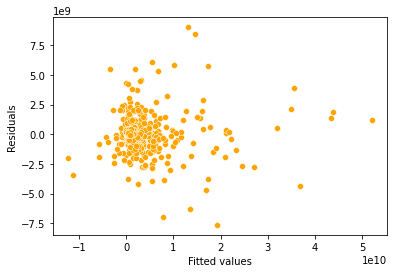

In [40]:
ax = sns.scatterplot(x = model_3.fittedvalues, y=model_3.resid,color = 'orange')

plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## MLxtend on forward and backward selection:

In [41]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 8.9 MB/s eta 0:00:011
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [51]:
# step forward feature selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(LinearRegression(), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2')

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.2s finished

[2023-02-25 17:23:03] Features: 1/20 -- score: 0.8486861347517305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.2s finished

[2023-02-25 17:23:03] Features: 2/20 -- score: 0.8983549916777769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished

[2023-02-25 17:23:03] Features: 3/20 -- score: 0.9230397505243866[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [52]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['accounts_receivable', 'addl_income_expense_items', 'common_stocks',
       'equity_earnings_loss_unconsolidated_subsidiary', 'gross_profit',
       'investments', 'liabilities', 'long_term_debt', 'long_term_investments',
       'net_receivables', 'non_recurring_items', 'operating_income',
       'other_current_liabilities', 'other_equity', 'pre_tax_margin',
       'profit_margin', 'research_and_development', 'short_term_investments',
       'total_assets', 'total_equity'],
      dtype='object')

In [53]:
# backward Elimination feature selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(LinearRegression(), 
           k_features=20, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2')

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.7s finished

[2023-02-25 17:23:17] Features: 56/20 -- score: 0.953765159128267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.6s finished

[2023-02-25 17:23:18] Features: 55/20 -- score: 0.9563541809839702[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished

[2023-02-25 17:23:19] Features: 54/20 -- score: 0.9590366089276154[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished

[2023-02-25 17:23:28] Features: 28/20 -- score: 0.9692685311057264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished

[2023-02-25 17:23:28] Features: 27/20 -- score: 0.9690455440334077[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished

[2023-02-25 17:23:28] Features: 26/20 -- score: 0.9686580509709944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished

[2023-02-25 17:23:28] Features: 25/

In [54]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['accounts_receivable', 'addl_income_expense_items', 'common_stocks',
       'cost_of_revenue', 'equity_earnings_loss_unconsolidated_subsidiary',
       'fixed_assets', 'goodwill', 'interest_expense', 'investments',
       'liabilities', 'minority_interest', 'non_recurring_items',
       'operating_income', 'other_assets', 'other_equity',
       'other_operating_activities', 'other_operating_items',
       'sales_general_and_admin', 'total_equity', 'total_revenue'],
      dtype='object')

In [58]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs1 = EFS(LinearRegression(), 
           min_features=1,
           max_features=20,
           scoring='r2',
           print_progress=True)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.7s finished

[2023-02-25 17:25:34] Features: 56/20 -- score: 0.953765159128267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.7s finished

[2023-02-25 17:25:35] Features: 55/20 -- score: 0.9563541809839702[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished

[2023-02-25 17:25:36] Features: 54/20 -- score: 0.9590366089276154[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished

[2023-02-25 17:25:45] Features: 28/20 -- score: 0.9692685311057264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished

[2023-02-25 17:25:45] Features: 27/20 -- score: 0.9690455440334077[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished

[2023-02-25 17:25:45] Features: 26/20 -- score: 0.9686580509709944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished

[2023-02-25 17:25:45] Features: 25/

In [59]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['accounts_receivable', 'addl_income_expense_items', 'common_stocks',
       'cost_of_revenue', 'equity_earnings_loss_unconsolidated_subsidiary',
       'fixed_assets', 'goodwill', 'interest_expense', 'investments',
       'liabilities', 'minority_interest', 'non_recurring_items',
       'operating_income', 'other_assets', 'other_equity',
       'other_operating_activities', 'other_operating_items',
       'sales_general_and_admin', 'total_equity', 'total_revenue'],
      dtype='object')